In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cnn-dataset/vehicles/7981.jpg
/kaggle/input/cnn-dataset/vehicles/6234.jpg
/kaggle/input/cnn-dataset/vehicles/1269.jpg
/kaggle/input/cnn-dataset/vehicles/3863.jpg
/kaggle/input/cnn-dataset/vehicles/6241.jpg
/kaggle/input/cnn-dataset/vehicles/623.jpg
/kaggle/input/cnn-dataset/vehicles/2193.jpg
/kaggle/input/cnn-dataset/vehicles/3750.jpg
/kaggle/input/cnn-dataset/vehicles/2008.jpg
/kaggle/input/cnn-dataset/vehicles/5982.jpg
/kaggle/input/cnn-dataset/vehicles/7737.jpg
/kaggle/input/cnn-dataset/vehicles/2081.jpg
/kaggle/input/cnn-dataset/vehicles/6588.jpg
/kaggle/input/cnn-dataset/vehicles/7966.jpg
/kaggle/input/cnn-dataset/vehicles/3919.jpg
/kaggle/input/cnn-dataset/vehicles/6197.jpg
/kaggle/input/cnn-dataset/vehicles/6399.jpg
/kaggle/input/cnn-dataset/vehicles/9960.jpg
/kaggle/input/cnn-dataset/vehicles/3757.jpg
/kaggle/input/cnn-dataset/vehicles/9131.jpg
/kaggle/input/cnn-dataset/vehicles/9620.jpg
/kaggle/input/cnn-dataset/vehicles/9062.jpg
/kaggle/input/cnn-dataset/vehicle

In [19]:
import os
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

dataset_path = '/kaggle/input/cnn-dataset' 



In [28]:
# transform = transforms.Compose([
#     transforms.Resize((28, 28)),  # Resize images to 28x28
#     transforms.ToTensor(),
# ])

combinedDataset = datasets.ImageFolder(root=dataset_path)


In [46]:
import torchvision
import random
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid
import time

In [30]:
## getting length of the dataset and class names
print(f'total samples {len(combinedDataset)}')
print(f'classes {combinedDataset.classes}')


total samples 30000
classes ['dogs', 'food', 'vehicles']


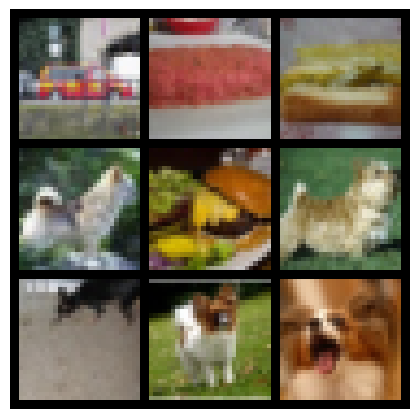

In [31]:
import random
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid

indices = random.sample(range(len(combinedDataset)), 9)

images = []
labels = []
for idx in indices:
    image, label = combinedDataset[idx]
    images.append(transform(image)) 
    labels.append(label)

images_tensor = torch.stack(images)

grid_img = make_grid(images_tensor, nrow=3, padding=2)

plt.figure(figsize=(4, 4))
plt.imshow(grid_img.permute(1, 2, 0))  
plt.axis('off')  
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.show()


{'dogs': 10000, 'food': 10000, 'vehicles': 10000}


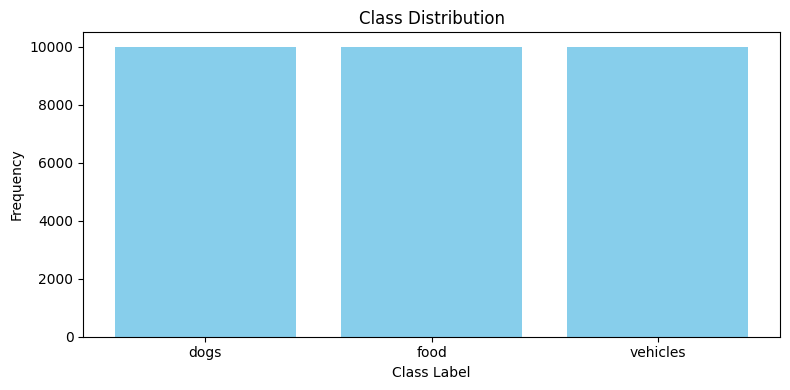

In [32]:
def classCounts(dataset):
    class_counts = {cls: 0 for cls in dataset.classes}
    for _, label in dataset:
        class_counts[dataset.classes[label]] += 1
        # print(class_counts)
    return class_counts

class_counts = classCounts(combinedDataset)
print(class_counts)

plt.figure(figsize=(8, 4))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Distribution')
# plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()


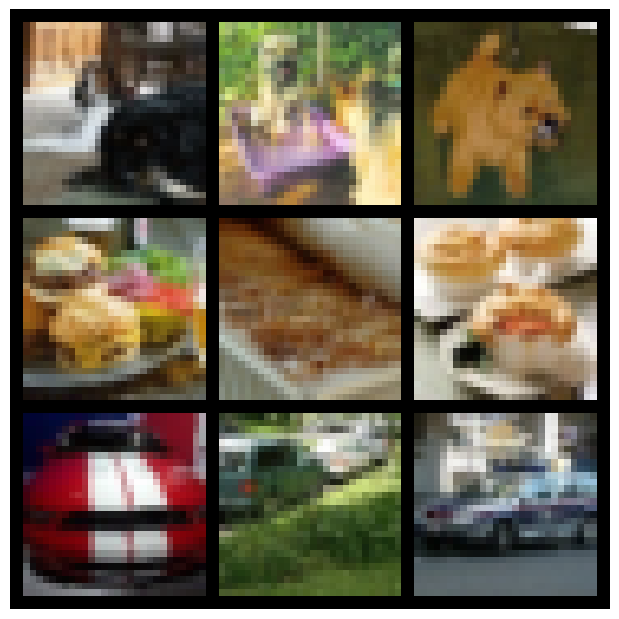

In [34]:
images = []
labels = []

for class_idx, class_name in enumerate(class_counts):
    # Get indices of all images for the current class
    # print(class_idx,class_name)
    sampleIndixces = [i for i, label in enumerate(combinedDataset.targets) if label == class_idx]
    
    # Randomly select 3 indices from the class
    samples = random.sample(sampleIndixces, 3)
    
    # Collect the images and labels
    for idx in samples:
        image, label = combinedDataset[idx]
        images.append(transform(image))  # Apply transformation to convert to tensor
        labels.append(label)

# Stack images into a single tensor
images_tensor = torch.stack(images)
grid_img = make_grid(images_tensor, nrow=3, padding=2)

plt.figure(figsize=(6, 6))
plt.imshow(grid_img.permute(1, 2, 0))  # Convert the image from (C, H, W) to (H, W, C)
plt.axis('off')  # Hide axis labels and ticks
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove any padding or borders
plt.show()


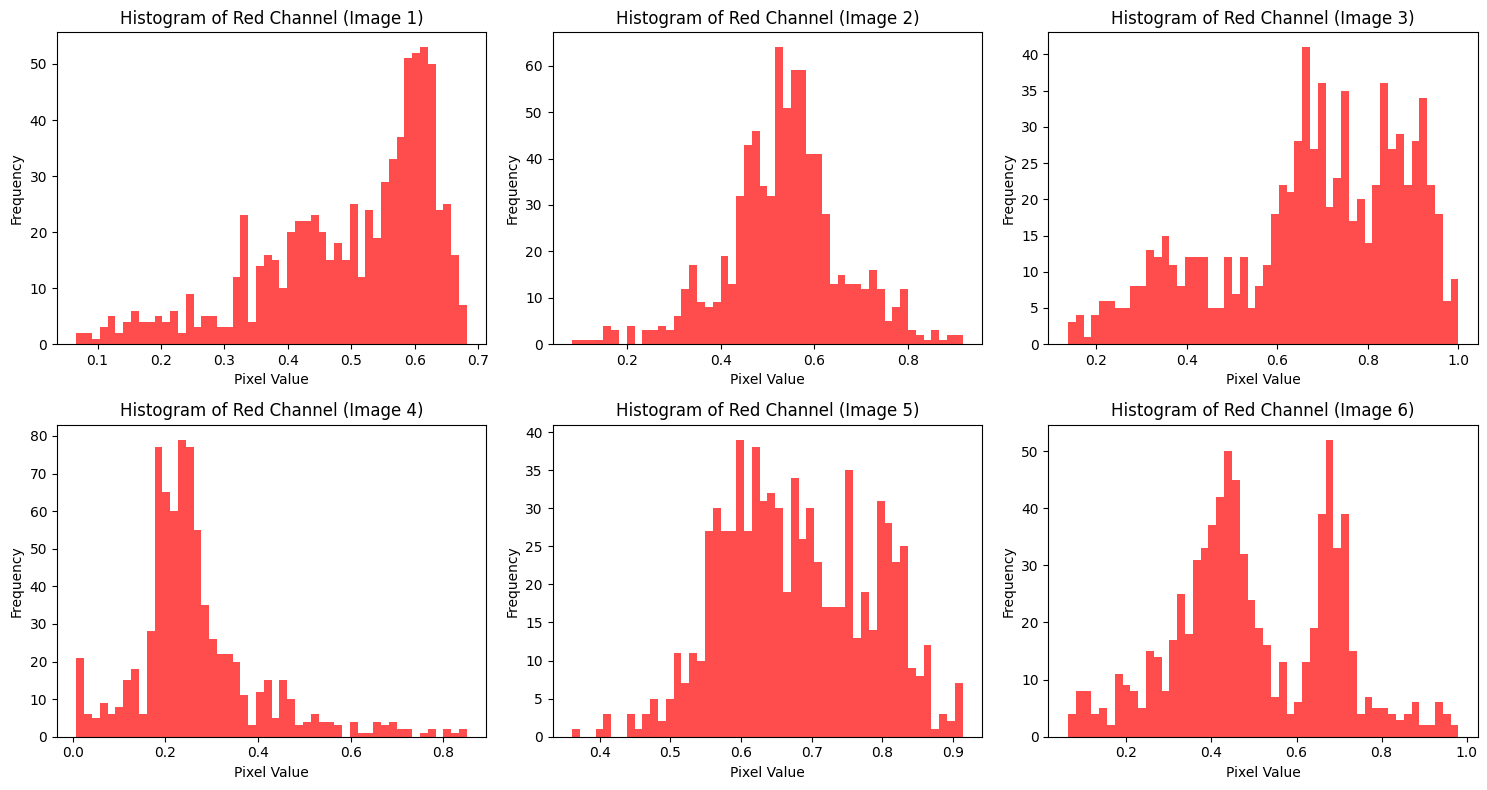

In [36]:
sampleImages = random.sample(range(len(combinedDataset)), 6)
plt.figure(figsize=(15, 8))
for i, j in enumerate(sampleImages):
    image, label = combinedDataset[j]  
    imgtensor = transform(image) 

    # pixel values for Red channel
    channelRed = imgtensor[0].numpy().flatten() 
    # green_channel = imgtensor[0].numpy().flatten()
    plt.subplot(2, 3, i + 1)
    plt.hist(channelRed, bins=50, color='red', alpha=0.7)
    plt.title(f'Histogram of Red Channel (Image {i+1})')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


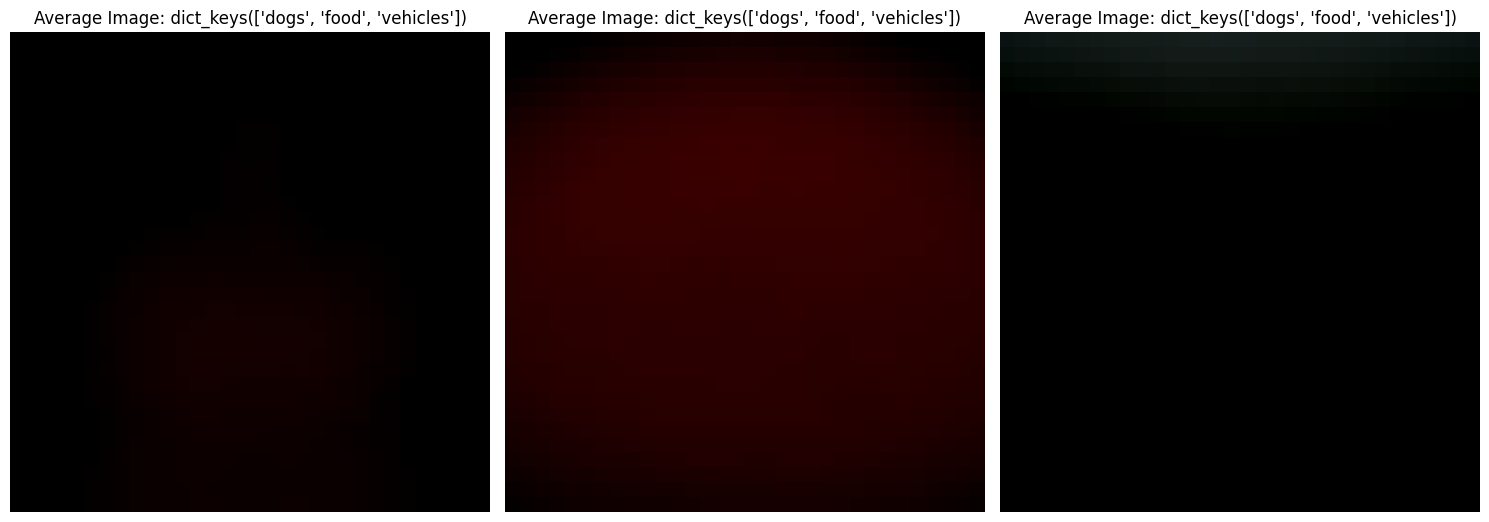

In [146]:
plt.figure(figsize=(15, 10))

for class_idx, class_name in enumerate(class_counts.keys()):
    indices = [i for i, label in enumerate(combinedDataset.targets) if label == class_idx]
    classSum = None
    imagesperClass = len(indices)
    for idx in indices:
        image, label = combinedDataset[idx]
        imgTensor = transform(image)  
        if classSum is None:
            classSum = imgTensor
        else:
            classSum += imgTensor
    avgimage = classSum / imagesperClass

    plt.subplot(1, 3, class_idx + 1)  
    plt.imshow(avgimage.permute(1, 2, 0))  
    plt.title(f'Average Image: {class_counts.keys()}')
    plt.axis('off')  
plt.tight_layout()  
plt.show()


# preprocessing

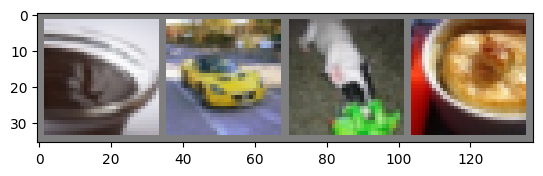

In [39]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((32,32)), 
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
transformData = datasets.ImageFolder(root=dataset_path,transform=transform)

indices = list(range(len(transformData)))  

# 70% train, 15% validation, 15% test 
trainIndices, tempIndices = train_test_split(indices, test_size=0.3, stratify=transformData.targets, random_state=42)
valIndices, testIndices = train_test_split(tempIndices, test_size=0.5, stratify=[transformData.targets[i] for i in tempIndices], random_state=42)

trainData = Subset(transformData, trainIndices)
valData = Subset(transformData, valIndices)
testData = Subset(transformData, testIndices)

batchsize = 64
trainLoader = DataLoader(trainData, batch_size=batchsize, shuffle=True)
valLoader = DataLoader(valData, batch_size=batchsize, shuffle=False)
testLoader = DataLoader(testData, batch_size=batchsize, shuffle=False)



def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(trainLoader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:4]))


In [40]:
device = torch.device(
    'cuda' if torch.cuda.is_available() else
    'mps' if torch.backends.mps.is_available() else
    'cpu'
)
device

device(type='cuda')

In [41]:
import torch
import torch.nn as nn

class VGG16(nn.Module):
    def __init__(self, num_classes=3, dropout_rate=0.5, input_size=(32, 32)): 
        super(VGG16, self).__init__()

        self.input_size = input_size 

        # First convolutional block (conv1)
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Second convolutional block (conv2)
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Third convolutional block (conv3)
        self.conv3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Fourth convolutional block (conv4)
        self.conv4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        # Fifth convolutional block (conv5)
        self.conv5 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        # Dynamically calculate the size of the feature map after the convolutions
        # self._get_conv_output_size()

        # Fully connected layers
        self.fc1 = nn.Linear(8192, 4096) 
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)

        # Dropout after each fully connected layer
        self.dropout = nn.Dropout(p=dropout_rate)

    # def _get_conv_output_size(self):
    #     # Create a dummy tensor with the input size to calculate the output size
    #     x = torch.randn(1, 3, self.input_size[0], self.input_size[1])
    #     x = self.conv1(x)
    #     x = self.conv2(x)
    #     x = self.conv3(x)
    #     x = self.conv4(x)
    #     x = self.conv5(x)
    #     self.fc_input_size = x.view(1, -1).size(1)  # Flatten the tensor and get its size
    #     print(x.view(1, -1).size(1))
    #     print(self.fc_input_size)
        
    def forward(self, x):
        x = self.conv1(x).to(device)
        x = self.conv2(x).to(device)
        x = self.conv3(x).to(device)
        x = self.conv4(x).to(device)
        x = self.conv5(x).to(device)

        # Flatten the output for the fully connected layers
        x = x.view(x.size(0), -1)

        # Fully connected layers with dropout
        x = self.fc1(x).to(device)
        x = nn.ReLU(inplace=True)(x).to(device)
        x = self.dropout(x).to(device)  # Dropout after fc1
        x = self.fc2(x).to(device)
        x = nn.ReLU(inplace=True)(x).to(device)
        x = self.dropout(x).to(device)  # Dropout after fc2
        x = self.fc3(x).to(device)

        return x


In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

def train_model(model, train_loader, num_epochs=3, criterion=None, optimizer=None, scheduler=None, device=None):
    TrainLoss = []
    TrainAcc = []
    model.train().to(device)

    # Set device (GPU or CPU)
    device = device
    model.to(device)

    # Default values for loss and optimizer if not provided
    criterion = criterion or nn.CrossEntropyLoss()
    optimizer = optimizer or optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    for epoch in range(num_epochs):
        StartTime = time.time()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            # Move data to the appropriate device (GPU or CPU)
            images, labels = images.to(device), labels.to(device)
            
            # Zero gradients from the previous step
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            
            # Calculate loss
            loss = criterion(outputs, labels)
            
            # Backward pass and update model weights
            loss.backward()
            optimizer.step()
            
            # Track running loss and accuracy
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            endTime = time.time()
        
        # Calculate average loss and accuracy
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = (correct / total) * 100
        TrainLoss.append(epoch_loss)
        TrainAcc.append(epoch_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.2f}, Accuracy: {epoch_acc:.2f}%, Epoch training time: {endTime - StartTime:.2f} seconds')
        if scheduler:
            scheduler.step()

    return model,TrainLoss,TrainAcc


In [44]:
def initialize_weights(model, init_type='xavier'):
    if init_type == 'xavier':
        for m in model.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    elif init_type == 'he':
        for m in model.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
    
    elif init_type == 'lecun':
        for m in model.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='linear')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
    
    elif init_type == 'normal':
        for m in model.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, mean=0, std=0.01)  
                if m.bias is not None:
                    nn.init.zeros_(m.bias)


In [47]:
# Initialize the model
model = VGG16(num_classes=3).to(device)

# Initialize with different weight initializations
initializations = ['xavier', 'he', 'lecun', 'normal']

for initializationType in initializations:
    print(f"\nInitializing model with {initializationType} initialization")
    initialize_weights(model, initializationType) 

    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

    trained_model, train_loss, train_acc = train_model(model, trainLoader, num_epochs=3, criterion=nn.CrossEntropyLoss(), optimizer=optimizer, scheduler=scheduler, device=device)

    print(f"Finished training with {initializationType} initialization")



Initializing model with xavier initialization
Epoch [1/3], Loss: 1.10, Accuracy: 33.27%, Epoch training time: 32.88 seconds
Epoch [2/3], Loss: 1.10, Accuracy: 32.70%, Epoch training time: 32.45 seconds
Epoch [3/3], Loss: 1.10, Accuracy: 33.32%, Epoch training time: 32.78 seconds
Finished training with xavier initialization

Initializing model with he initialization
Epoch [1/3], Loss: 2.68, Accuracy: 33.40%, Epoch training time: 32.14 seconds
Epoch [2/3], Loss: 1.10, Accuracy: 33.49%, Epoch training time: 31.88 seconds
Epoch [3/3], Loss: 1.10, Accuracy: 32.87%, Epoch training time: 32.06 seconds
Finished training with he initialization

Initializing model with lecun initialization
Epoch [1/3], Loss: 1.12, Accuracy: 32.98%, Epoch training time: 31.61 seconds
Epoch [2/3], Loss: 1.10, Accuracy: 33.24%, Epoch training time: 32.47 seconds
Epoch [3/3], Loss: 1.10, Accuracy: 33.34%, Epoch training time: 31.67 seconds
Finished training with lecun initialization

Initializing model with normal 

### from the experiment above we can conclude that Normal  Weight Initilization works the best for our network given the dataset
### thus we'll move forward with this Initilization technique

In [ ]:
modelop = VGG16(num_classes=3).to(device)
print(device)
initializations = (modelop, 'xavier')
resultsXavier = []

# Optimizers to experiment with
optimizers = {
    'SGD': optim.SGD(modelop.parameters(), lr=0.001, momentum=0.9, weight_decay=0.005),
    'Adam': optim.Adam(modelop.parameters(), lr=0.001),
    'AdamW': optim.AdamW(modelop.parameters(), lr=0.001, weight_decay=0.01),
    'RMSprop': optim.RMSprop(modelop.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0.01)
}

for optimizer_name, optimizer in optimizers.items():
    print(f"\nTraining with {optimizer_name} optimizer")
    
    scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
    
    trained_model, train_loss, train_acc = train_model(modelop, trainLoader, num_epochs=5, criterion=nn.CrossEntropyLoss(),optimizer=optimizer, scheduler=scheduler, device=device)
    results.append({
        'optimizer': optimizer_name,
        'train_loss': train_loss,
        'train_accuracy': train_acc
    })

# for result in results:
    # print(f"{result['optimizer']} -> Training Loss: {result['train_loss']}, Training Accuracy: {result['train_accuracy']}")


cuda

Training with SGD optimizer
Epoch [1/5], Loss: 1.10, Accuracy: 32.75%, Epoch training time: 30.94 seconds
Epoch [2/5], Loss: 1.10, Accuracy: 32.73%, Epoch training time: 30.41 seconds
Epoch [3/5], Loss: 1.10, Accuracy: 33.12%, Epoch training time: 31.07 seconds
Epoch [4/5], Loss: 1.10, Accuracy: 33.42%, Epoch training time: 30.52 seconds
Epoch [5/5], Loss: 1.10, Accuracy: 33.40%, Epoch training time: 31.09 seconds

Training with Adam optimizer
Epoch [1/5], Loss: 0.79, Accuracy: 63.45%, Epoch training time: 31.67 seconds
Epoch [2/5], Loss: 0.55, Accuracy: 78.03%, Epoch training time: 32.32 seconds
Epoch [3/5], Loss: 0.49, Accuracy: 81.26%, Epoch training time: 32.36 seconds
Epoch [4/5], Loss: 0.37, Accuracy: 86.17%, Epoch training time: 32.52 seconds
Epoch [5/5], Loss: 0.34, Accuracy: 87.37%, Epoch training time: 32.12 seconds

Training with AdamW optimizer
Epoch [1/5], Loss: 0.40, Accuracy: 84.95%, Epoch training time: 32.30 seconds
Epoch [2/5], Loss: 0.41, Accuracy: 85.22%, Epoc

In [52]:
modelop = VGG16(num_classes=3).to(device)
print(device)
initializations = (modelop, 'normal')
resultsNorm = []

# Optimizers to experiment with
optimizers = {
    'Adam': optim.Adam(modelop.parameters(), lr=0.001),
    'AdamW': optim.AdamW(modelop.parameters(), lr=0.001, weight_decay=0.01),
}

for optimizer_name, optimizer in optimizers.items():
    print(f"\nTraining with {optimizer_name} optimizer")
    
    scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
    
    trained_model, train_loss, train_acc = train_model(modelop, trainLoader, num_epochs=5, criterion=nn.CrossEntropyLoss(),optimizer=optimizer, scheduler=scheduler, device=device)
    results.append({
        'optimizer': optimizer_name,
        'train_loss': train_loss,
        'train_accuracy': train_acc
    })

# for result in results:
    # print(f"{result['optimizer']} -> Training Loss: {result['train_loss']}, Training Accuracy: {result['train_accuracy']}")


cuda

Training with Adam optimizer
Epoch [1/5], Loss: 0.80, Accuracy: 62.37%, Epoch training time: 31.13 seconds
Epoch [2/5], Loss: 0.51, Accuracy: 81.31%, Epoch training time: 32.02 seconds
Epoch [3/5], Loss: 0.41, Accuracy: 85.30%, Epoch training time: 31.76 seconds
Epoch [4/5], Loss: 0.31, Accuracy: 88.72%, Epoch training time: 32.03 seconds
Epoch [5/5], Loss: 0.28, Accuracy: 89.79%, Epoch training time: 31.66 seconds

Training with AdamW optimizer
Epoch [1/5], Loss: 0.34, Accuracy: 87.65%, Epoch training time: 32.31 seconds
Epoch [2/5], Loss: 0.32, Accuracy: 88.75%, Epoch training time: 31.60 seconds
Epoch [3/5], Loss: 0.30, Accuracy: 89.55%, Epoch training time: 32.13 seconds
Epoch [4/5], Loss: 0.25, Accuracy: 91.17%, Epoch training time: 31.68 seconds
Epoch [5/5], Loss: 0.21, Accuracy: 92.37%, Epoch training time: 32.31 seconds


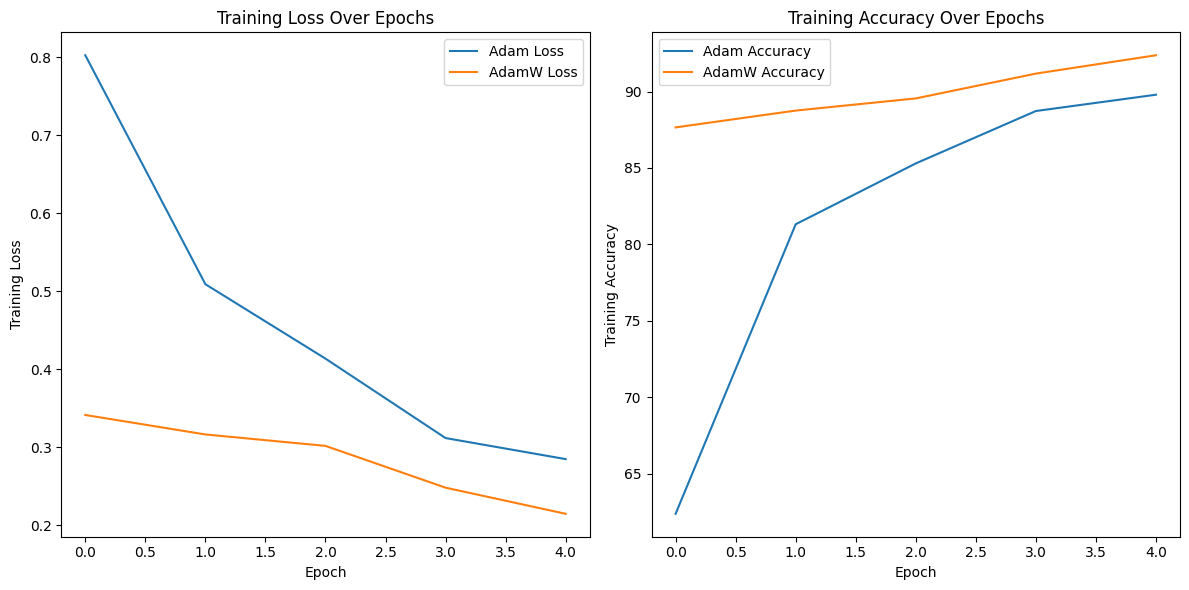

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for result in resultsXavier:
    plt.plot(result['train_loss'], label=f"{result['optimizer']} Loss")
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Epochs With Xavier Initialization')
plt.legend()

plt.subplot(1, 2, 2)
for result in resultsXavier:
    plt.plot(result['train_accuracy'], label=f"{result['optimizer']} Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Over Epochs Xavier Initialization')
plt.legend()

plt.tight_layout()
plt.show()


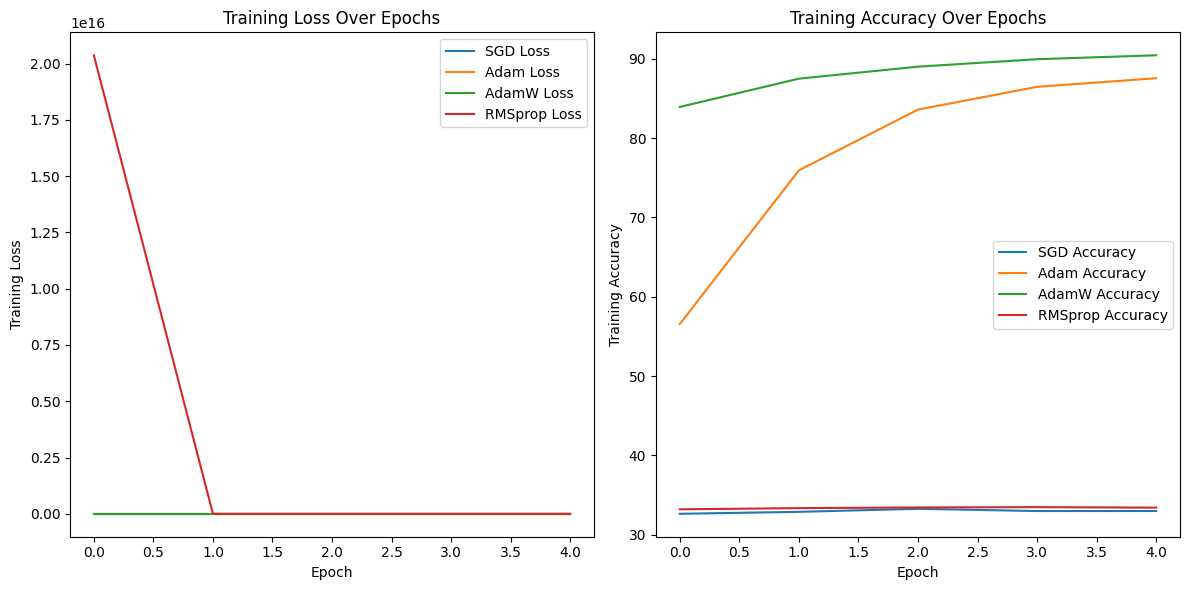

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for result in resultsNorm:
    plt.plot(result['train_loss'], label=f"{result['optimizer']} Loss")
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Epochs With Normal Initialization')
plt.legend()

plt.subplot(1, 2, 2)
for result in resultsNorm:
    plt.plot(result['train_accuracy'], label=f"{result['optimizer']} Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Over Epochs Normal Initialization')
plt.legend()

plt.tight_layout()
plt.show()


In [58]:
batchsize = 32
trainLoader32 = DataLoader(trainData, batch_size=batchsize, shuffle=True)

batchsize = 64
trainLoader64 = DataLoader(trainData, batch_size=batchsize, shuffle=True)

In [56]:
modelBatch= VGG16(num_classes=3).to(device)
initializations = (modelBatch, 'normal')
optimizer = optim.AdamW(modelBatch.parameters(), lr=0.001, weight_decay=0.01)
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
StartTime32 = time.time()
trained_model32, train_loss32, train_acc32 = train_model(modelBatch, trainLoader32, num_epochs=10, criterion=nn.CrossEntropyLoss(),optimizer=optimizer, scheduler=scheduler, device=device)
endTime32 = time.time()
print(f'batch size 32 trained in: {endTime32 - StartTime32:.2f} seconds')

# print(batch size 32 trained in )
StartTime64 = time.time()
trained_model64, train_loss64, train_acc64 = train_model(modelBatch, trainLoader64, num_epochs=10, criterion=nn.CrossEntropyLoss(),optimizer=optimizer, scheduler=scheduler, device=device)
endTime64 = time.time()
print(f'batch size 64 trained in: {endTime64 - StartTime64:.2f} seconds')


Epoch [1/10], Loss: 0.78, Accuracy: 62.79%, Epoch training time: 56.35 seconds
Epoch [2/10], Loss: 0.55, Accuracy: 78.98%, Epoch training time: 38.34 seconds
Epoch [3/10], Loss: 0.45, Accuracy: 83.11%, Epoch training time: 37.86 seconds
Epoch [4/10], Loss: 0.35, Accuracy: 87.02%, Epoch training time: 38.09 seconds
Epoch [5/10], Loss: 0.33, Accuracy: 87.53%, Epoch training time: 38.48 seconds
Epoch [6/10], Loss: 0.32, Accuracy: 88.16%, Epoch training time: 37.69 seconds
Epoch [7/10], Loss: 0.30, Accuracy: 88.71%, Epoch training time: 37.97 seconds
Epoch [8/10], Loss: 0.30, Accuracy: 88.97%, Epoch training time: 38.22 seconds
Epoch [9/10], Loss: 0.30, Accuracy: 88.91%, Epoch training time: 37.34 seconds
Epoch [10/10], Loss: 0.30, Accuracy: 89.01%, Epoch training time: 37.04 seconds
batch size 32 trained in: 397.40 seconds
Epoch [1/10], Loss: 0.30, Accuracy: 88.98%, Epoch training time: 32.07 seconds
Epoch [2/10], Loss: 0.30, Accuracy: 89.08%, Epoch training time: 32.41 seconds
Epoch [3/1

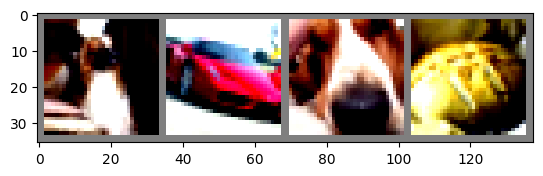

In [161]:
traintransform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

evaltransforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


trainData.dataset.transform = traintransform
valData.dataset.transform = evaltransforms
testData.dataset.transform = evaltransforms


batchsize = 64
trainLoaderFinalSet = DataLoader(trainData, batch_size=batchsize, shuffle=True)
valLoaderFinalSet = DataLoader(valData, batch_size=batchsize, shuffle=False)
testLoaderFinalSet = DataLoader(testData, batch_size=batchsize, shuffle=False)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(trainLoaderFinalSet)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:4]))

In [163]:

def trainBestModel(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs, patience=3, device="cpu"):
    print(device)
    bestLoss = float('inf')
    earlyStopEpoch = 0
    trainLosses = []
    valLosses = []
    trainAccuracies = []
    valAccuracies = []
    
    for epoch in range(num_epochs):
        model.to(device)
        model.train()  
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()  
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        avgTrainLoss = running_loss / len(train_loader)
        train_accuracy = correct / total
        
        # Validation phase
        model.eval() 
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avgValLoss = val_loss / len(val_loader)
        val_accuracy = correct / total
        writelogs.add_scalar('Training Loss', avgTrainLoss, epoch)
        writelogs.add_scalar('Validation Loss', avgValLoss, epoch)
        writelogs.add_scalar('Training Accuracy', train_accuracy, epoch)
        writelogs.add_scalar('Validation Accuracy', val_accuracy, epoch)

        trainLosses.append(avgTrainLoss)
        valLosses.append(avgValLoss)
        trainAccuracies.append(train_accuracy)
        valAccuracies.append(val_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {avgTrainLoss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Val Loss: {avgValLoss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        scheduler.step()

        # Early stopping
        if avgValLoss < bestLoss:
            bestLoss = avgValLoss
            earlyStopEpoch = 0  
            print(f"saving model at epoch {epoch+1}")
            torch.save(model.state_dict(), 'best_model_vgg.pth')  
        else:
            earlyStopEpoch += 1

        if earlyStopEpoch >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    return model, trainLosses, valLosses, trainAccuracies, valAccuracies


In [164]:
def evaluate_model(model, val_loader, criterion, device="cpu"):
    device = device
    print(device)
    model.eval().to(device)
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avgValLoss = val_loss / len(val_loader)
    val_accuracy = correct / total
    
    return avgValLoss, val_accuracy


In [185]:
import os
import tensorflow as tf
from torch.utils.tensorboard import SummaryWriter
# writelogs = SummaryWriter('runs/part1_vgglogs')

logDir = '/kaggle/working/tensorboard_logs/part1_vgglogsFinal/'

if os.path.exists(logDir):
    import shutil
    print("Logs removed and new ones will be written.")
    shutil.rmtree(logDir)
os.makedirs(logDir, exist_ok=True)
writelogs = SummaryWriter(logDir)


Logs removed and new ones will be written.


In [186]:
modelFinal= VGG16(num_classes=3).to(device)
initializations = (modelFinal, 'normal')
optimizer = optim.AdamW(modelFinal.parameters(), lr=0.0001, weight_decay=0.01)
scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

# trained_model64, train_loss64, train_acc64 = train_model(modelBatch, trainLoader64, num_epochs=10, criterion=nn.CrossEntropyLoss(),optimizer=optimizer, scheduler=scheduler, device=device)
# endTime64 = time.time()
# print(f'batch size 64 trained in: {endTime64 - StartTime64:.2f} seconds')

bestModel, trainLossesBest, valLossesBest, trainAccuraciesBest, valAccuraciesBest= trainBestModel(modelFinal, trainLoaderFinalSet, valLoaderFinalSet, criterion=nn.CrossEntropyLoss(), optimizer=optimizer, scheduler=scheduler, num_epochs = 30, patience=3, device=device)

cuda
Epoch [1/30], Train Loss: 0.7607, Train Accuracy: 0.6342, Val Loss: 0.6242, Val Accuracy: 0.7547
saving model at epoch 1
Epoch [2/30], Train Loss: 0.4353, Train Accuracy: 0.8307, Val Loss: 0.4160, Val Accuracy: 0.8324
saving model at epoch 2
Epoch [3/30], Train Loss: 0.3637, Train Accuracy: 0.8623, Val Loss: 0.4034, Val Accuracy: 0.8420
saving model at epoch 3
Epoch [4/30], Train Loss: 0.2877, Train Accuracy: 0.8916, Val Loss: 0.3093, Val Accuracy: 0.8782
saving model at epoch 4
Epoch [5/30], Train Loss: 0.2710, Train Accuracy: 0.8969, Val Loss: 0.3046, Val Accuracy: 0.8824
saving model at epoch 5
Epoch [6/30], Train Loss: 0.2598, Train Accuracy: 0.9028, Val Loss: 0.2995, Val Accuracy: 0.8842
saving model at epoch 6
Epoch [7/30], Train Loss: 0.2497, Train Accuracy: 0.9062, Val Loss: 0.2929, Val Accuracy: 0.8858
saving model at epoch 7
Epoch [8/30], Train Loss: 0.2467, Train Accuracy: 0.9066, Val Loss: 0.2928, Val Accuracy: 0.8864
saving model at epoch 8
Epoch [9/30], Train Loss: 0

In [187]:
writelogs.close()

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

def displayImages(test_loader, all_labels, all_preds, imagesNum=10):
    misId = [i for i, (true, pred) in enumerate(zip(all_labels, all_preds)) if true != pred]
    misclassifiedImages = [test_loader.dataset[i][0] for i in misId]
    misclassifiedLabels = [all_labels[i] for i in misId]
    misclassifiedPreds = [all_preds[i] for i in misId]
    for i in range(min(imagesNum, len(misclassifiedImages))): 
        img = misclassifiedImages[i]
        label = misclassifiedLabels[i]
        pred = misclassifiedPreds[i]
        img = img / 2 + 0.5  # Unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.title(f'True: {label}, Pred: {pred}')
        plt.show()

In [189]:
def confusionMatrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Test Loss: 0.2610, Test Accuracy: 0.9029
Precision: 0.9039, Recall: 0.9029, F1 Score: 0.9031


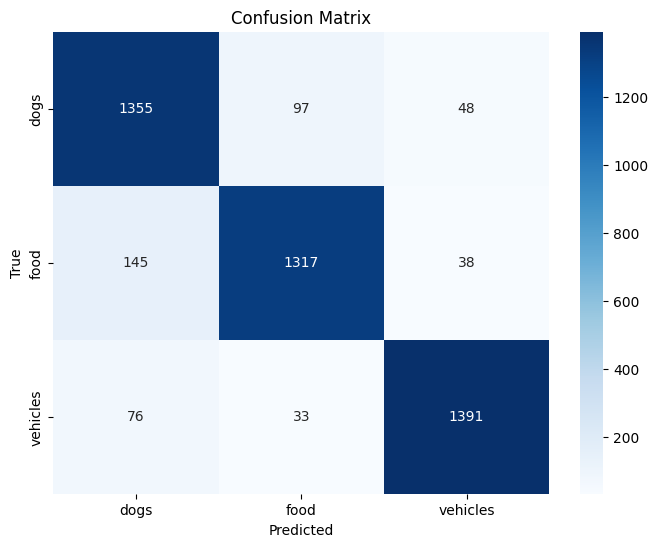

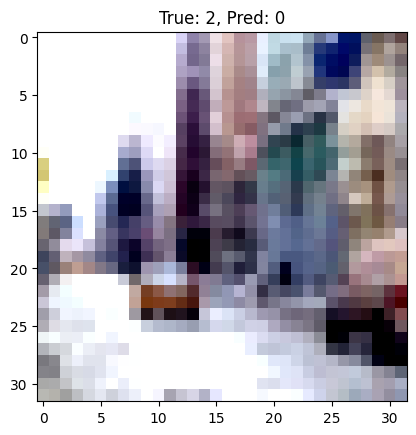

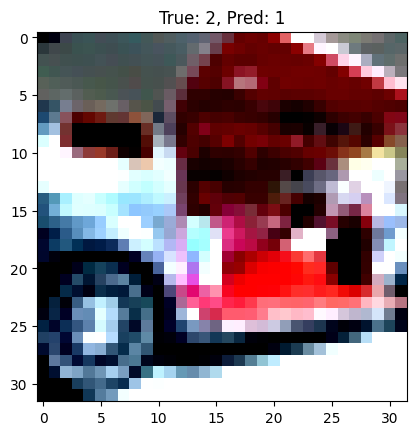

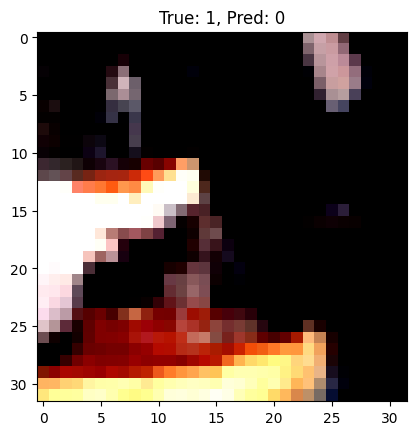

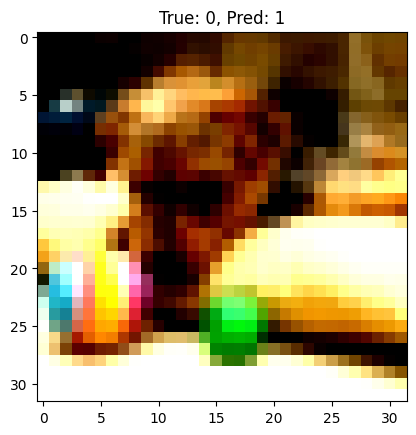

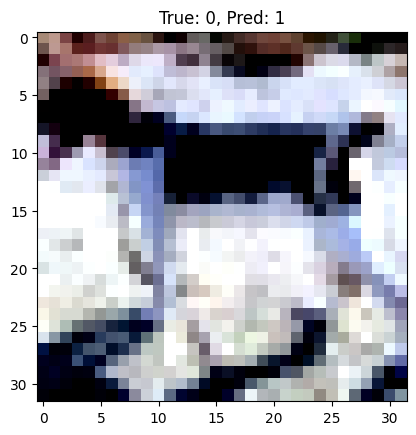

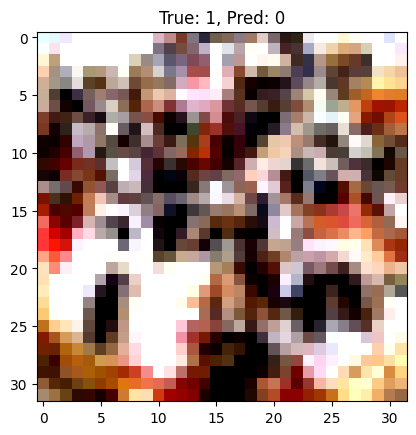

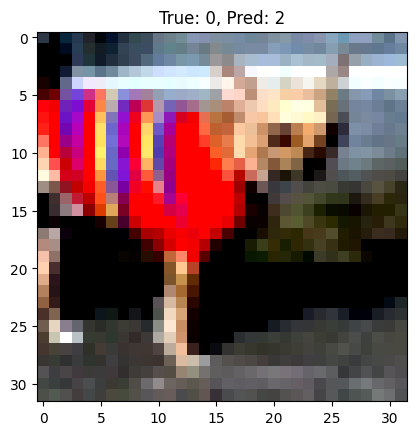

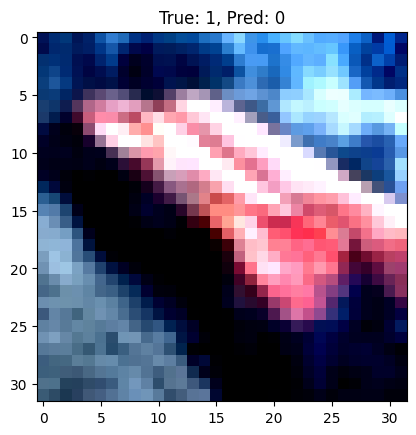

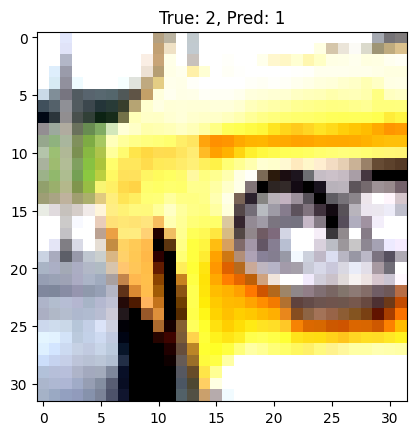

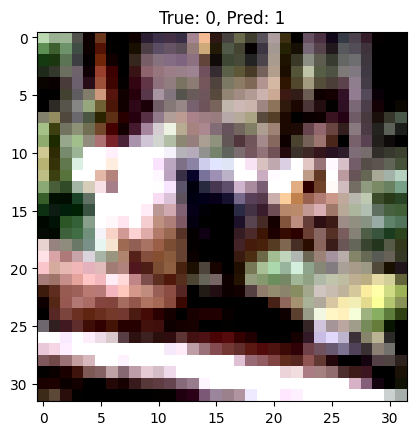

In [190]:
def test_model(model, test_loader, criterion, device, class_names):
    model.to(device)
    model.eval().to(device)
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():  
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    testLoss = running_loss / len(test_loader)
    testAccuracy = correct / total
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

    print(f"Test Loss: {testLoss:.4f}, Test Accuracy: {testAccuracy:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    confusionMatrix(all_labels, all_preds, class_names)

    displayImages(test_loader, all_labels, all_preds, imagesNum=10)

    return testLoss, testAccuracy
class_names = class_counts.keys()
testLoss, testAccuracy = test_model(bestModel, testLoaderFinalSet, nn.CrossEntropyLoss(), device,class_names )


[0.2610419714744662, 0.2610419714744662, 0.2610419714744662, 0.2610419714744662, 0.2610419714744662, 0.2610419714744662, 0.2610419714744662, 0.2610419714744662, 0.2610419714744662, 0.2610419714744662, 0.2610419714744662, 0.2610419714744662, 0.2610419714744662, 0.2610419714744662, 0.2610419714744662]


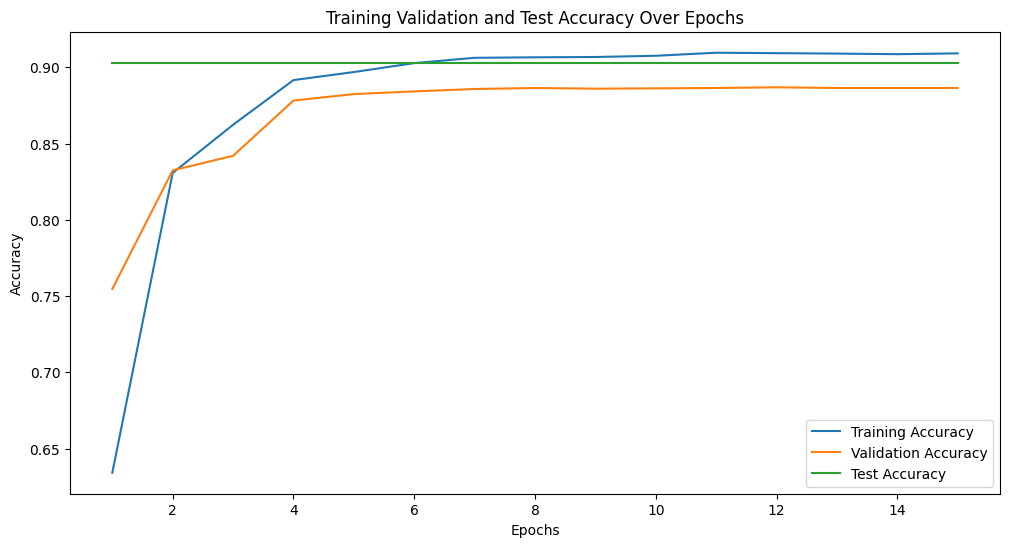

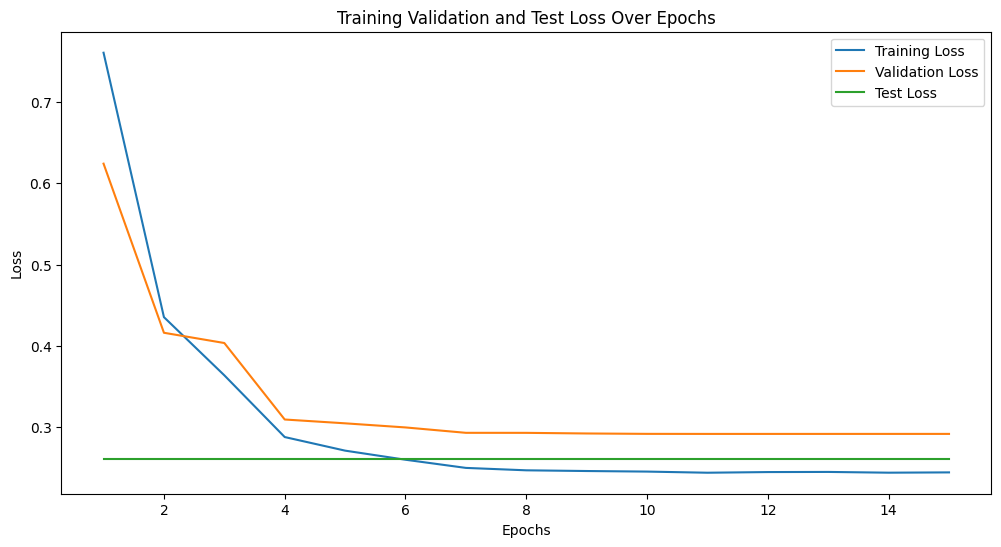

In [191]:
def plot_metrics(train_accuracies, val_accuracies,test_accuracies,train_losses,val_losses,test_losses):
    epochs = range(1, len(train_accuracies) + 1)
    test_accuracies= [test_accuracies] * len(train_accuracies)
    test_losses = [test_losses] * len(train_accuracies)
    print(test_losses)
    # accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_accuracies, label='Training Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.plot(epochs, test_accuracies, label='Test Accuracy')
    plt.title('Training Validation and Test Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # loss
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.plot(epochs, test_losses, label='Test Loss')
    plt.title('Training Validation and Test Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


plot_metrics(trainAccuraciesBest, valAccuraciesBest,testAccuracy,trainLossesBest, valLossesBest,testLoss)